In [1]:
import sqlite3
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("database.sqlite")

In [3]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [4]:
countries = pd.read_sql("""SELECT *
                        FROM Country; """, conn)


countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
League = pd.read_sql("""SELECT *
                        FROM League; """, conn)


League

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [6]:
# using join function to connect league and their country
team_league = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = league.country_id; """, conn)


team_league

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [7]:
Player = pd.read_sql('''SELECT * FROM Player''' , conn)
Player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [8]:
Player_Attributes = pd.read_sql('''SELECT * FROM Player_Attributes''' ,conn)
Player_Attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


<AxesSubplot:>

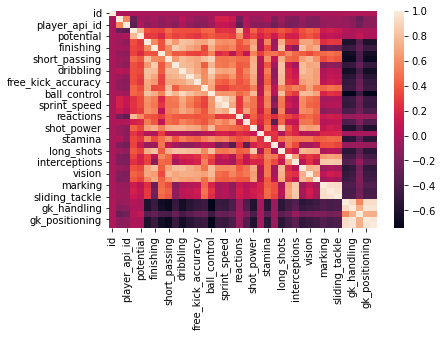

In [9]:
#trying to find correlation between overall rating and other skills
Player_Attributes.corr()
sns.heatmap(Player_Attributes.corr())
# overall rating has highest correlation with potential and reactions

In [10]:
#player attributes is an intresting table for indivisual skills and using join function to connect it with their player
player_and_attributes = pd.read_sql( ''' SELECT * FROM Player_Attributes 
JOIN Player on Player_Attributes.player_api_id = Player.player_api_id''',conn )
player_and_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,84.0,20.0,20.0,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,73.0,20.0,20.0,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,73.0,20.0,20.0,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,73.0,20.0,20.0,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [11]:
#retrieve statical information for overall rating 
player_and_attributes.overall_rating.describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [12]:
# rating vs heights
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


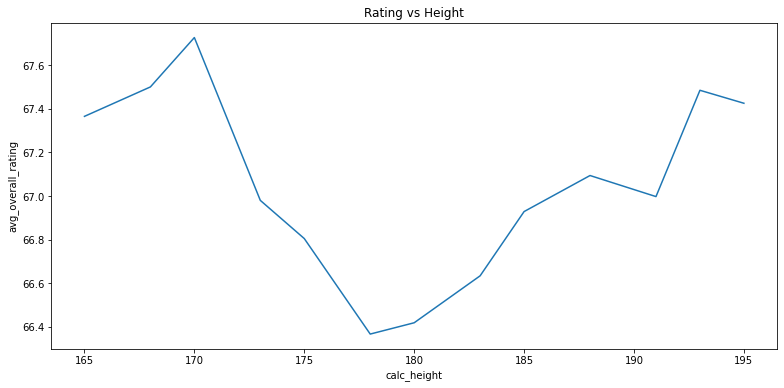

In [13]:
plt.figure(figsize=(13,6))
x = players_height['calc_height']
y = players_height['avg_overall_rating']
plt.plot(x, y)
plt.xlabel('calc_height')
plt.ylabel('avg_overall_rating')
plt.title('Rating vs Height')
plt.show()

In [14]:
#best team of fifa according to skills and rating
legends = pd.read_sql(''' SELECT * FROM Player_Attributes 
JOIN Player on Player_Attributes.player_api_id = Player.player_api_id WHERE overall_rating>85 ''' , conn)
legends
legends.player_name

0                    Adriano
1                    Adriano
2                    Adriano
3       Alessandro Del Piero
4       Alessandro Del Piero
                ...         
1094      Zlatan Ibrahimovic
1095      Zlatan Ibrahimovic
1096      Zlatan Ibrahimovic
1097      Zlatan Ibrahimovic
1098      Zlatan Ibrahimovic
Name: player_name, Length: 1099, dtype: object

In [15]:
# now we can do some analysis on team attributes and find the performance and its correlations
team_attributes = pd.read_sql('''SELECT * FROM Team_Attributes''' , conn)
team_attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


<AxesSubplot:>

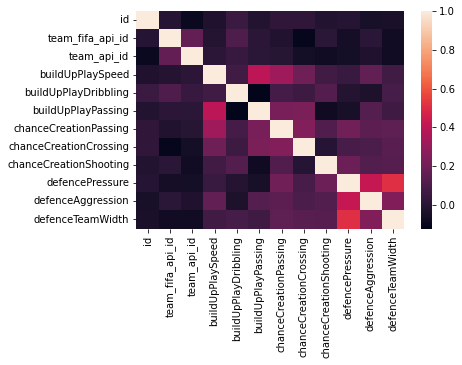

In [16]:
#trying to find correlation for team attributes
team_attributes.corr()
sns.heatmap(team_attributes.corr())
#defence team width and defence pressure have highest correlation 

In [17]:
#estimating left or right foor for player with overall rating higher than average and use group by function
foot_ = pd.read_sql('''select overall_rating,preferred_foot from Player_Attributes where overall_rating>68 group by preferred_foot''' , conn)
foot_
#above average 74 players are left foot and 69 people right foot

,overall_rating,preferred_foot
0,74,left
1,69,right


In [18]:
#Analysis of individual seasons ordered by Country Name, League name, and descending year
leagues_by_season = pd.read_sql("""SELECT Country.name AS country_name,
                                        League.name AS league_name,
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_goals,
                                        avg(away_team_goal) AS avg_away_team_goals,
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif,
                                        avg(home_team_goal+away_team_goal) AS avg_goals,
                                        sum(home_team_goal+away_team_goal) AS total_goals
                                    FROM Match
                                        JOIN Country on Country.id = Match.country_id
                                        JOIN League on League.id = Match.league_id
                                        LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                        LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                    WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                    GROUP BY Country.name, League.name, season
                                    HAVING count (distinct stage) > 10
                                    ORDER BY Country.name, League.name, season DESC
                                    ;""", conn)

leagues_by_season


,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_goals,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


In [19]:
leagues_by_season.describe()
# spanish league in 2008/2009 has the highest goal number in one season

,number_of_stages,number_of_teams,avg_home_team_goals,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,37.200000,19.600000,1.542547,1.145233,0.397314,2.687780,976.925000
std,1.620383,0.810191,0.106867,0.095642,0.089291,0.182108,71.627021
min,34.000000,18.000000,1.286842,0.971053,0.196078,2.257895,843.000000
25%,38.000000,20.000000,1.473026,1.078947,0.340729,2.560526,922.750000
50%,38.000000,20.000000,1.539474,1.118421,0.377632,2.718421,977.000000
75%,38.000000,20.000000,1.625658,1.201483,0.452696,2.799342,1042.250000
max,38.000000,20.000000,1.748366,1.411765,0.623684,3.160131,1101.000000


In [20]:
# average goals by season by country Table
agbs_df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()),columns=leagues_by_season['country_name'].unique())

agbs_df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']== 'Germany','avg_goals'])
agbs_df.loc[:,'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name']== 'Spain','avg_goals'])
agbs_df.loc[:,'France'] = list(leagues_by_season.loc[leagues_by_season['country_name']== 'France','avg_goals'])
agbs_df.loc[:,'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name']== 'Italy','avg_goals'])
agbs_df.loc[:,'England'] = list(leagues_by_season.loc[leagues_by_season['country_name']== 'England','avg_goals'])
agbs_df

,England,France,Germany,Italy,Spain
2008/2009,2.700000,2.526316,2.830065,2.576316,2.744737
2009/2010,2.565789,2.492105,2.754902,2.686016,2.655263
2010/2011,2.768421,2.455263,3.160131,2.723684,2.750000
2011/2012,2.797368,2.544737,2.934641,2.639474,2.871053
2012/2013,2.805263,2.515789,2.859477,2.583799,2.763158
2013/2014,2.797368,2.342105,2.921569,2.513158,2.742105
2014/2015,2.771053,2.410526,2.830065,2.610526,2.713158
2015/2016,2.478947,2.257895,2.921569,2.600000,2.897368


<AxesSubplot:title={'center':'average goals per game'}>

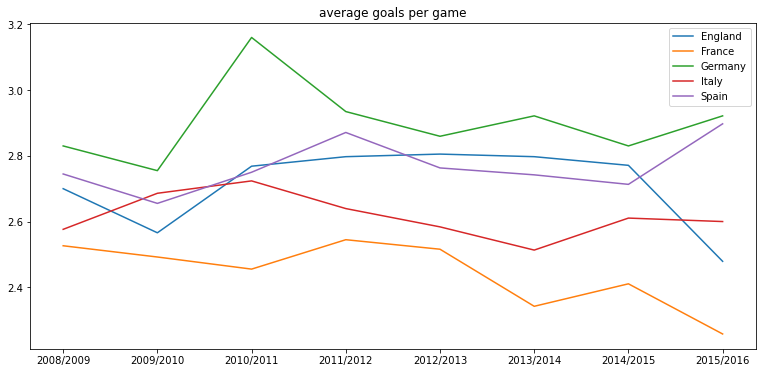

In [21]:
agbs_df.plot(figsize=(13,6),title = 'average goals per game')
# german league has the highest average goals per game all the way since 2008 season and significantly higher in season 2010/11